In [65]:
import pandas as pd
import numpy as np
import re
import us

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", message="Workbook contains no default style*.")

# Data

Source: Burea of Labor Statistics Occupational Employment Statistics  
https://data.bls.gov/oes/

In [124]:
# Read in data and rename columns
data_scientist = pd.read_excel('data/wages_data_scientist.xlsx', engine='openpyxl', skiprows=5)[0:51]
data_scientist.columns = ['state', 'data_scientist']

database_admin = pd.read_excel('data/wages_database_admin.xlsx', engine='openpyxl', skiprows=5)[0:51]
database_admin.columns = ['state', 'database_admin']

developer = pd.read_excel('data/wages_developer.xlsx', engine='openpyxl', skiprows=5)[0:52]
developer.columns = ['state', 'developer']

statistician = pd.read_excel('data/wages_statistician.xlsx', engine='openpyxl', skiprows=5)[0:47]
statistician.columns = ['state', 'statistician']

# Merge data
df = (pd
    .merge(data_scientist, database_admin, on='state', how='outer')
    .merge(developer, on='state', how='outer')
    .merge(statistician, on='state', how='outer')
)

# Remove codes from states and convert to abbreviations
df.state = df.state.apply(lambda x: re.sub(r'\(.*\)', '', x))
df.state = df.state.apply(lambda x: us.states.lookup(x).abbr if x != 'District of Columbia' else 'DC')

# Convert columns to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Add average wage column
df['avg'] = df.apply(lambda x: x[1:].mean(), axis=1)

# Print
df.head(10)

,state,data_scientist,database_admin,developer,statistician,avg
0,AL,91570.0,87090.0,107870.0,75230.0,90440.0
1,AK,103810.0,92040.0,137940.0,103360.0,109287.5
2,AZ,104220.0,99370.0,121930.0,85060.0,102645.0
3,CA,147390.0,114240.0,182570.0,136210.0,145102.5
4,CO,116560.0,111210.0,136230.0,92240.0,114060.0
5,CT,110220.0,114910.0,120180.0,128630.0,118485.0
6,DE,133320.0,104620.0,121410.0,111650.0,117750.0
7,DC,110190.0,111530.0,136970.0,114100.0,118197.5
8,FL,100780.0,100260.0,113300.0,83820.0,99540.0
9,GA,106400.0,99220.0,120120.0,107920.0,108415.0


# Visualizations

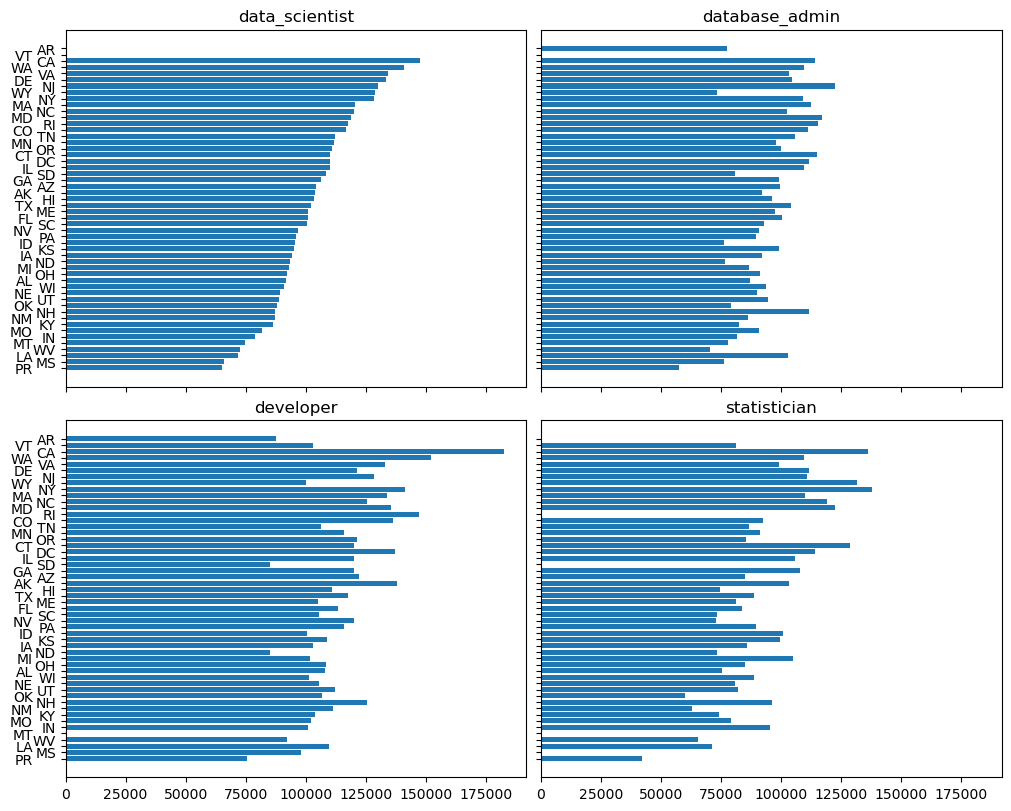

In [104]:
df.sort_values(by='data_scientist', ascending=True, inplace=True)

fig, axes = plt.subplots(2, 2, layout='constrained', sharex=True, sharey=True, figsize=(10, 8))

for ax, col in zip(axes.ravel(), df.columns[1:]):
    ax.barh(df.state, df[col])
    ax.set_title(col)

    for i, label in enumerate(ax.get_yticklabels()):
        if i % 2 == 0: 
            label.set_position((-0.05, 0))

plt.show()

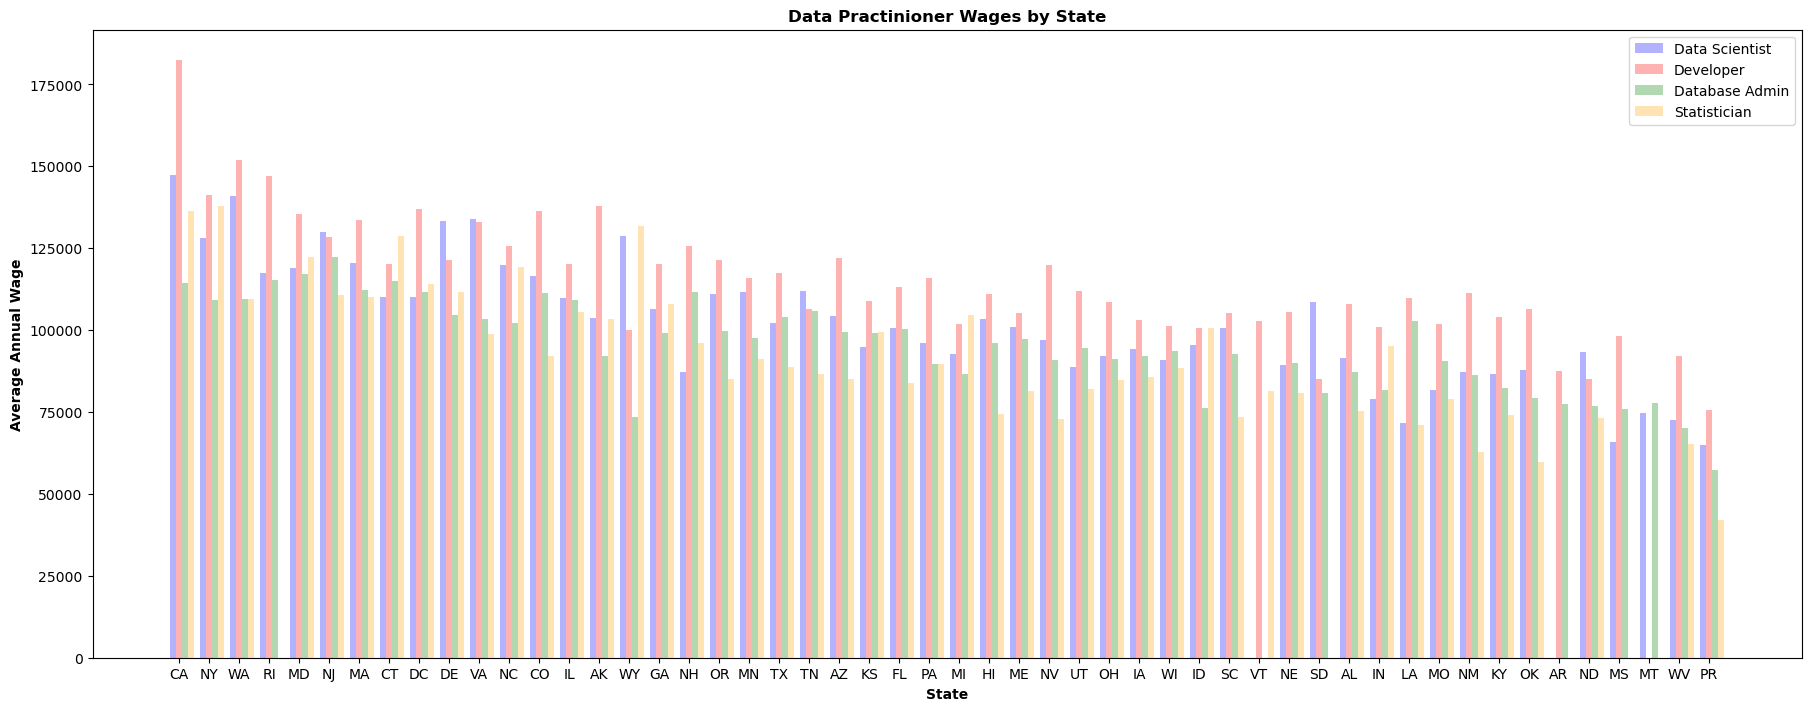

In [157]:
df.sort_values(by='avg', ascending=False, inplace=True)

# Setting the positions and width for the bars
positions = np.arange(len(df.state))  # Position of bars on x-axis
barWidth = 0.2
group_spacing = 0.2
positions = np.arange(len(df.state)) * (4 * barWidth + group_spacing)
alpha = 0.3

# Set up fig
plt.figure(figsize=(18, 7), layout='constrained')

# Plotting both groups
plt.bar(positions - barWidth, df.data_scientist, color='blue', width=barWidth, alpha=alpha, label='Data Scientist')
plt.bar(positions, df.developer, color='red', width=barWidth, alpha=alpha, label='Developer')
plt.bar(positions + barWidth, df.database_admin, color='green', width=barWidth, alpha=alpha, label='Database Admin')
plt.bar(positions + barWidth*2, df.statistician, color='orange', width=barWidth, alpha=alpha, label='Statistician')
# plt.bar(positions + barWidth/2, df.avg, color='black', width=barWidth-0.1, label='Average')

# Adding labels
plt.xlabel('State', fontweight='bold')
plt.xticks(positions, df.state)
plt.ylabel('Average Annual Wage', fontweight='bold')
plt.title('Data Practitioner Wages by State', fontweight='bold')

# Creating legend
plt.legend(loc='upper right')

# Showing the plot
plt.show()